# 频繁模式和关联规则挖掘报告
## 数据集（Consumer & Visitor Insights For Neighborhoods）

### 1.导入Python模块

In [1]:
import pandas as pd
import numpy as np
from efficient_apriori import apriori

### 2. 读取数据

In [2]:
path = "./"
data_df = pd.read_csv(path+'/cbg_patterns.csv', index_col=0)

In [3]:
data_df.head()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
census_block_group,,,,,,,,,,,,
1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


### 3. 读取如下数据字段，进行频繁模式和关联规则挖掘：
字段名：top_brands，表示CBG中访问过的顶级品牌列表，限十大品牌；

通过算法挖掘top_brands，即CBG中访问过的顶级品牌列表中各顶级品牌访问之间的关联。

In [4]:
select = ['top_brands']
data_df[select].head()

,top_brands
census_block_group,
1.005951e+10,"[""CrossFit"",""Health Mart"",""Coldwell Banker""]"
1.009051e+10,[]
1.047957e+10,"[""Dollar General""]"
1.069040e+10,"[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc..."
1.073011e+10,"[""Chevron"",""CrossFit""]"


In [5]:
data_df[select].shape

(220735, 1)

### 4. 数据处理-删除缺失值

In [6]:
use_df = data_df[select].dropna()

In [7]:
use_df.shape

(220735, 1)

### 数据处理-数据格式转换，转换成适合进行关联规则挖掘的形式；

In [8]:
top_brands = []
for index, row in use_df.iterrows():
    top_brands.append(tuple(row["top_brands"][1:-1].split(",")))
top_brands

[('"CrossFit"', '"Health Mart"', '"Coldwell Banker"'),
 ('',),
 ('"Dollar General"',),
 ('"Chick-fil-A"',
  '"Sam\'s Club"',
  '"Olive Garden"',
  '"mcdonalds"',
  '"T.J. Maxx"',
  '"TGI Fridays"',
  '"Beef \'O\' Brady\'s"',
  '"McAlister\'s Deli"',
  '"Max Muscle"',
  '"LifeWay Christian Stores"'),
 ('"Chevron"', '"CrossFit"'),
 ('"walmart"',
  '"Winn Dixie"',
  '"Ollie\'s Bargain Outlet"',
  '"Sonic"',
  '"Anytime Fitness"',
  '"Murphy USA"',
  '"Dollar Tree"',
  '"Waffle House"',
  '"CVS"',
  '"Little Caesars"'),
 ('"United States Postal Service (USPS)"',
  '"SUBWAY"',
  '"America\'s Thrift Store"'),
 ('"Dollar General"',
  '"United States Postal Service (USPS)"',
  '"Marathon Petroleum"'),
 ('"Papa Murphy\'s"',
  '"Burger King US"',
  '"Chevron"',
  '"Play It Again Sports"',
  '"Plato\'s Closet"',
  '"SUBWAY"'),
 ('"ConocoPhillips"',),
 ('',),
 ('"Shell Oil"',
  '"Circle K Stores"',
  '"Grease Monkey"',
  '"AutoZone"',
  '"Right at Home"'),
 ('"Circle K Stores"', '"Dollar General"'

### 5. Apriori算法挖掘关联规则

1）项集的最小支持度（Minimum Support）：关联规则要求项集必须满足的最小支持阈值，称为项集的最小支持度（Minimum Support）。

2) 频繁项集:支持度大于或等于supmin的项集，简称频繁集。

通常k-项集如果满足supmin，称为k-频繁集，记作Lk。

3) 最小置信度（Minimum Confidence），它表示关联规则需要满足的最低可靠性。


In [9]:
#设置最小的支持度：0.005，最小的置信度:0.9，挖掘频繁项集和规则
itemsets, rules = apriori(top_brands, min_support=0.005,  min_confidence=0.9)

### 5.1 输出关联规则和频繁项集 ，关联度高的品牌之间存在某种联系使得顾客会同时访问；

In [10]:
#关联规则
rules

[{"Jeep"} -> {"Dodge"},
 {"Dodge"} -> {"Jeep"},
 {"Dodge"} -> {"Chrysler"},
 {"Chrysler"} -> {"Dodge"},
 {"Jeep"} -> {"Chrysler"},
 {"Chrysler"} -> {"Jeep"},
 {"Dodge", "Jeep"} -> {"Chrysler"},
 {"Chrysler", "Jeep"} -> {"Dodge"},
 {"Chrysler", "Dodge"} -> {"Jeep"}]

在满足最小的支持度为0.005，最小的置信度为0.9的条件下，共有9条规则输出。

In [11]:
#输出频繁项集
itemsets

{1: {('"CrossFit"',): 4392,
  ('"Health Mart"',): 3444,
  ('',): 74540,
  ('"Dollar General"',): 13515,
  ('"Chick-fil-A"',): 1920,
  ('"mcdonalds"',): 12670,
  ('"Chevron"',): 5128,
  ('"Anytime Fitness"',): 2047,
  ('"Dollar Tree"',): 5359,
  ('"Waffle House"',): 1196,
  ('"Sonic"',): 3199,
  ('"Little Caesars"',): 2988,
  ('"walmart"',): 4623,
  ('"CVS"',): 6899,
  ('"United States Postal Service (USPS)"',): 22119,
  ('"SUBWAY"',): 16600,
  ('"Marathon Petroleum"',): 4405,
  ('"Burger King US"',): 5649,
  ('"ConocoPhillips"',): 1695,
  ('"Shell Oil"',): 10940,
  ('"Circle K Stores"',): 5130,
  ('"AutoZone"',): 3903,
  ('"Valero Energy"',): 3650,
  ('"Pizza Hut"',): 4209,
  ('"starbucks"',): 8088,
  ('"Holiday Inn Express"',): 1357,
  ('"Popeyes Louisiana Kitchen"',): 1673,
  ('"7-Eleven US"',): 6659,
  ('"Dunkin\' Donuts"',): 6912,
  ('"Aflac (American Family Life Assurance)"',): 4871,
  ('"Cricket Wireless"',): 10195,
  ('"Jazzercise"',): 1130,
  ('"Domino\'s Pizza"',): 4101,
  ('"

### 5.2 导出关联规则，计算其支持度与置信度
1）支持度（Support）：计算在所有的交易集中，既有A又有B的概率。

2）置信度（confidence）：表示了这条规则有多大程度上值得可信。设条件的项的集合为A,结果的集合为B。置信度计算在A中，同时也含有B的概率（即：if A ,then B的概率）。即 ：                                             

 Confidence(A=>B)=P(B|A) 

3）提升度：提升度代表的是A 的出现，对 B 的出现概率提升的”程度。提升度（A->B）大于1，表示有提升，等于1；表示没有提升也没有下降；小于1,表示有下降。


In [12]:
for rule in sorted(rules, key=lambda rule: rule.lift):
  print(rule) 

{"Dodge"} -> {"Chrysler"} (conf: 0.928, supp: 0.007, lift: 125.428, conv: 13.879)
{"Chrysler"} -> {"Dodge"} (conf: 0.914, supp: 0.007, lift: 125.428, conv: 11.504)
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336)
{"Dodge"} -> {"Jeep"} (conf: 0.917, supp: 0.007, lift: 126.226, conv: 11.913)
{"Jeep"} -> {"Chrysler"} (conf: 0.946, supp: 0.007, lift: 127.757, conv: 18.289)
{"Chrysler"} -> {"Jeep"} (conf: 0.928, supp: 0.007, lift: 127.757, conv: 13.747)
{"Chrysler", "Jeep"} -> {"Dodge"} (conf: 0.938, supp: 0.006, lift: 128.761, conv: 16.010)
{"Dodge", "Jeep"} -> {"Chrysler"} (conf: 0.965, supp: 0.006, lift: 130.323, conv: 28.136)
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875)


结果分析：第一条输出结果解释：同时访问Dodge和Chrysler的概率是0.7%，访问完Dodge再访问Chrysler的概率是92.8%，lift大于1，这是一条有效规则。

In [13]:
#可根据规则的前件和后件，筛选规则
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) 

{"Chrysler", "Jeep"} -> {"Dodge"} (conf: 0.938, supp: 0.006, lift: 128.761, conv: 16.010)
{"Dodge", "Jeep"} -> {"Chrysler"} (conf: 0.965, supp: 0.006, lift: 130.323, conv: 28.136)
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875)


### 6. 规则评价
使用lift相关系数和cosine值进行评价

### 6.1 lift相关系数
lift(A,B)=P(A交B)/(P(A)*P(B))=P(A)*P(B|A)/(P(A)*P(B))=P(B|A)/P(B)=confidence(A—>B)/support(B)=confidence(B—>A)/support(A)

In [14]:
for rule1 in rules:
    for rule2 in rules:
        if rule1 != rule2:
            lift = rule1.confidence/rule2.support
            print(rule1,rule2,"lift", lift)

{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Dodge"} -> {"Jeep"} (conf: 0.917, supp: 0.007, lift: 126.226, conv: 11.913) lift 137.7011852776045
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Dodge"} -> {"Chrysler"} (conf: 0.928, supp: 0.007, lift: 125.428, conv: 13.879) lift 135.9487924308031
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Chrysler"} -> {"Dodge"} (conf: 0.914, supp: 0.007, lift: 125.428, conv: 11.504) lift 135.9487924308031
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Jeep"} -> {"Chrysler"} (conf: 0.946, supp: 0.007, lift: 127.757, conv: 18.289) lift 133.88624478838327
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Chrysler"} -> {"Jeep"} (conf: 0.928, supp: 0.007, lift: 127.757, conv: 13.747) lift 133.88624478838327
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Dodge", "

### 6.2 cosine(A,B)
cosine(A,B)=P(A交B)/sqrt(P(A)*P(B))=sqrt(P(A|B)*P(B|A))=sqrt(confidence(A—>B)*confidence(B—>A))

In [15]:
import math
for rule1 in rules:
    for rule2 in rules:
        if rule1 != rule2:
            cosine = math.sqrt(rule1.confidence*rule2.confidence)
            print(rule1,rule2,"cosine:",cosine)

{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Dodge"} -> {"Jeep"} (conf: 0.917, supp: 0.007, lift: 126.226, conv: 11.913) cosine: 0.9180951647541881
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Dodge"} -> {"Chrysler"} (conf: 0.928, supp: 0.007, lift: 125.428, conv: 13.879) cosine: 0.923993385394538
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Chrysler"} -> {"Dodge"} (conf: 0.914, supp: 0.007, lift: 125.428, conv: 11.504) cosine: 0.9166126748659806
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Jeep"} -> {"Chrysler"} (conf: 0.946, supp: 0.007, lift: 127.757, conv: 18.289) cosine: 0.9325343113443377
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.336) {"Chrysler"} -> {"Jeep"} (conf: 0.928, supp: 0.007, lift: 127.757, conv: 13.747) cosine: 0.923646002856506
{"Jeep"} -> {"Dodge"} (conf: 0.920, supp: 0.007, lift: 126.226, conv: 12.

{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875) {"Dodge"} -> {"Jeep"} (conf: 0.917, supp: 0.007, lift: 126.226, conv: 11.913) cosine: 0.9343844749097904
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875) {"Dodge"} -> {"Chrysler"} (conf: 0.928, supp: 0.007, lift: 125.428, conv: 13.879) cosine: 0.9403873447728628
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875) {"Chrysler"} -> {"Dodge"} (conf: 0.914, supp: 0.007, lift: 125.428, conv: 11.504) cosine: 0.9328756819339308
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875) {"Jeep"} -> {"Chrysler"} (conf: 0.946, supp: 0.007, lift: 127.757, conv: 18.289) cosine: 0.9490798081636092
{"Chrysler", "Dodge"} -> {"Jeep"} (conf: 0.952, supp: 0.006, lift: 131.153, conv: 20.875) {"Chrysler"} -> {"Jeep"} (conf: 0.928, supp: 0.007, lift: 127.757, conv: 13.747) cosine: 0.9400337987976166
{"Chrysler"

### 7.对挖掘结果进行可视化操作

In [16]:
import matplotlib.pyplot as plt

def plot_bar(rules, data, title):
    plt.title(title)
    plt.xticks(range(len(data)),rules,rotation=90)
    plt.bar(range(len(data)), data, color = 'B')
    # plt.savefig('figures\\'+title+'.png')
    plt.show()

In [17]:
def visualization(big_rule_list):
    rules = []
    conf = []
    support = []
    lift = []
    for rule in big_rule_list:
        rules.append(rule)
        conf.append(rule.confidence)
        support.append(rule.support)
        lift.append(rule.lift)
    plot_bar(rules, support, 'rule-support figure')
    plot_bar(rules, conf, 'rule-confidence figure')
    plot_bar(rules, lift, 'rule-lift figure')

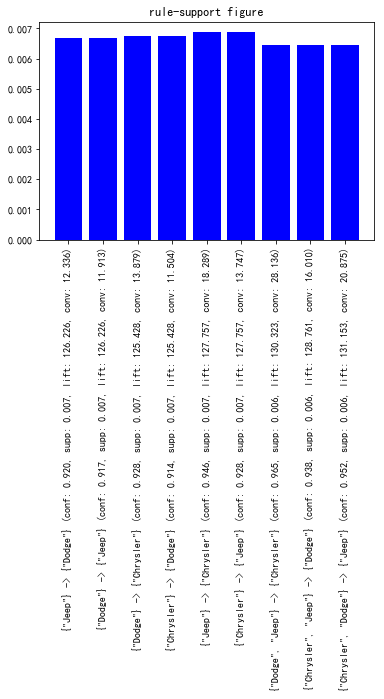

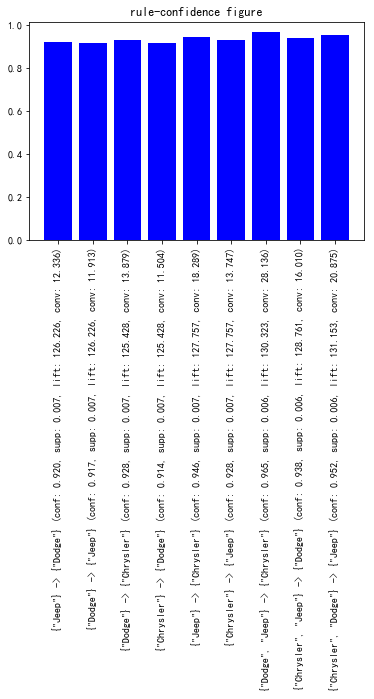

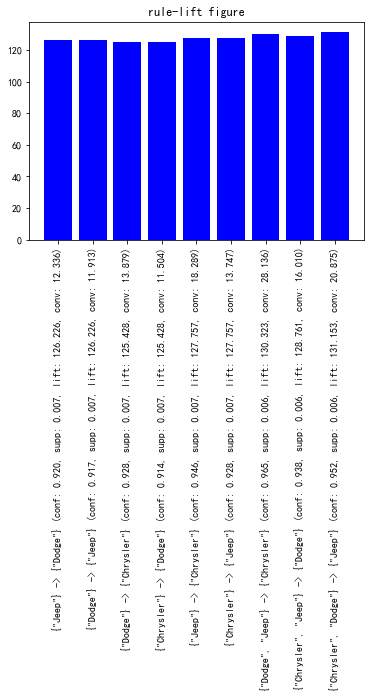

In [18]:
visualization(rules)